In [1]:
##imports -- run first thing!
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##clear PT.csv, L_obs.csv, L_obs_Norm.csv before running full program
##we're not using them in this rewrite but eehhhhh just to have
open('PT.csv', 'w').close()
open('L_obs.csv', 'w').close()
open('L_obs_Norm.csv', 'w').close()

starting minimum Lorentz factor wanted is: 3


,Gamma Min,Theta Max,Theta Obs 10^-3,Theta Obs 10^-4
0,3.0,14.2,22.0,32.0
1,5.0,13.6,20.0,27.0
2,7.0,13.2,19.0,24.0
3,9.0,13.0,18.0,23.0
4,11.0,12.7,17.0,21.0


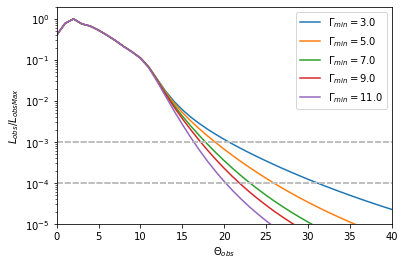

In [22]:
##### 2017 paper program #####
##declares

theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])

##formula stuff
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
inmin = float(input("starting minimum Lorentz factor wanted is: "))
while (inmin <=12):
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (41*np.pi/180)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(1*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(41,2)
    Nval = max(Lo[0:41,1])
    LoN = Lo[0:41,1]/Nval
    
    ##Graphing of Normalized Function
    fig = plt.figure(figsize=(7,5), dpi=100)
    plt.ylabel('$L_{obs} / L_{obsMax}$')
    plt.yscale("log")
    plt.ylim(.00001, 2)
    plt.xlim(0,40)
    plt.xlabel('$\Theta_{obs}$')
    x = Lo[0:41,0]
    y = LoN[0:41]
    plt.plot(x,y,label='$\Gamma_{min}=$' + str(inmin))
    plt.plot([0,50],[0.001,0.001],color='0.75', linestyle='dashed')
    plt.plot([0,50],[0.0001,0.0001],color='0.75', linestyle='dashed')
    plt.legend(loc="upper right")

    ##Observation table output
#    tadj3 = (LoN[0:41]-0.001)**2
#    tmin3 = np.where(tadj3 == tadj3.min())
#    tfar3 = max(tmin3[0])+1
#    t_obs_max3 = (int(tfar3))
    
#    tadj4 = (LoN[0:41]-0.0001)**2
#    tmin4 = np.where(tadj4 == tadj4.min())
#    tfar4 = max(tmin4[0])+1
#    t_obs_max4 = (int(tfar4))
    
#    obs_arr_i = np.array([inmin, theta_max, t_obs_max3, t_obs_max4])
#    obs_arr = np.append(obs_arr, obs_arr_i, 0)
    
#    inmin  = (inmin+2)
#    theta_o = 0.0
#    PT_arr = np.array([])
#    Lo_arr = np.array([])
    
#OA = obs_arr.reshape(5,4)
#pd.DataFrame(OA, columns=["Gamma Min", "Theta Max", "Theta Obs 10^-3", "Theta Obs 10^-4"])

In [14]:
##### 2018 paper program #####
Etheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Gamma = 100.0
theta_core = 10.0
theta_o = 0.0

for theta_o in range (0,25):
    if theta_o < theta_core:
        y1 = 1
        print(y1)
    elif theta_core < theta_o < 2*theta_core:
        q = (theta_o-theta_core)*Gamma
        y2 = q**(-4)
        print(y2)
        theta_o = theta_o+0.5
    elif 2*theta_core < theta_o:
        q = (theta_o-theta_core)*Gamma
        y3 = (q**(-6))*((theta_core*Gamma)**2)
        print(y3)
    theta_o+=0.1

1
1
1
1
1
1
1
1
1
1
1e-08
6.25e-10
1.2345679012345679e-10
3.90625e-11
1.6e-11
7.716049382716049e-12
4.164931278633902e-12
2.44140625e-12
1.5241579027587257e-12
5.644739300537774e-13
3.348979766803841e-13
2.0717621103300335e-13
1.328103086299076e-13
